In [20]:
# load packages

#!pip install xgboost

from xgboost import XGBClassifier
import pandas as pd
import xgboost as xgb


In [6]:
# import data

data = pd.read_csv('clean_data.csv')
print(data)

       Unnamed: 0     X.1 language  user_id        trait stim_id  order    rt  \
0               1  606711      SPA     9654    confident  BM-040     41  1903   
1               2  331376       HU     5381  responsible  WF-015     33   799   
2               3  162777      ENG     2734   attractive  LF-208     14  1226   
3               4  614094      SPA     9753       caring  BF-008     67  4561   
4               5  732055       PT    11726   aggressive  BF-201     36   912   
...           ...     ...      ...      ...          ...     ...    ...   ...   
99618       99619  122871      ENG     2044    emostable  AF-222     77  8696   
99619       99620  258587      ENG     4204      unhappy  BF-018    116  1858   
99620       99621  690717      ENG    10967    confident  WF-007     21  4344   
99621       99622   46646      SLO      789    confident  BM-250     10  1368   
99622       99623  845065    ES-PE    13579     dominant  WF-020     69  1799   

       rating country  ... 

In [9]:
positive = ['confident', 'responsible', 'attractive', 'caring', 'emostable', 'intelligent', 'sociable', 'trustworthy']
negative = ['aggressive', 'dominant', 'mean', 'old', 'unhappy', 'weird']
postraits = data[data['trait'].isin(positive)]
negtraits = data[data['trait'].isin(negative)]


In [23]:
# transform data types
postraits['Race'] = pd.Categorical(postraits['Race']).codes
postraits['Gender'] = pd.Categorical(postraits['Gender']).codes
postraits['trait'] = pd.Categorical(postraits['trait']).codes

/var/folders/33/549r3s6x3rg3lg7h3bjcgf6r0000gn/T/ipykernel_2402/1800384907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postraits['Race'] = pd.Categorical(postraits['Race']).codes
/var/folders/33/549r3s6x3rg3lg7h3bjcgf6r0000gn/T/ipykernel_2402/1800384907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postraits['Gender'] = pd.Categorical(postraits['Gender']).codes
/var/folders/33/549r3s6x3rg3lg7h3bjcgf6r0000gn/T/ipykernel_2402/1800384907.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [25]:
x_to_extract = ['Race', 'Gender', 'Age', 'rt', 'trait']
y_to_extract = ['rating']

posx = postraits[x_to_extract]
posy = postraits[y_to_extract]

dtrain = xgb.DMatrix(posx, posy)

#missing values
#dtrain = xgb.DMatrix(data, label=label, missing=np.NaN)

#Weights can be set when needed
#w = np.random.rand(5, 1)
#dtrain = xgb.DMatrix(data, label=label, missing=np.NaN, weight=w)

In [26]:
#set boosting parameters

param = {'max_depth': 2, 'eta': 1, 'objective': 'reg:squarederror'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist = [(dtrain, 'train')]

In [27]:
# training

num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

# save the model
bst.save_model('0001.model')


[17:45:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[0]	train-auc:nan
[17:45:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[1]	train-auc:nan
[17:45:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[2]	train-auc:nan
[17:45:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[3]	train-auc:nan
[17:45:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-

/Users/nanwang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

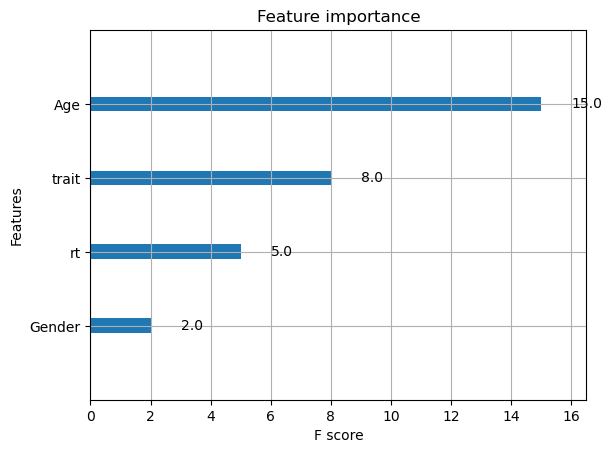

In [29]:
xgb.plot_importance(bst)


In [28]:
# dump model
bst.dump_model('dump.raw.txt')
# dump model with feature map
bst.dump_model('dump.raw.txt', 'featmap.txt')

bst = xgb.Booster({'nthread': 4})  # init model
bst.load_model('model.bin')  # load data

XGBoostError: [17:45:20] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/dmlc-core/src/io/local_filesys.cc:209: Check failed: allow_null:  LocalFileSystem::Open "featmap.txt": No such file or directory
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000134a0eb15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000134cad9f1 dmlc::io::LocalFileSystem::Open(dmlc::io::URI const&, char const*, bool) + 849
  [bt] (2) 3   libxgboost.dylib                    0x0000000134c97f7e dmlc::Stream::Create(char const*, char const*, bool) + 62
  [bt] (3) 4   libxgboost.dylib                    0x0000000134a3265c xgboost::LoadFeatureMap(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&) + 92
  [bt] (4) 5   libxgboost.dylib                    0x0000000134a32329 XGBoosterDumpModelEx + 265
  [bt] (5) 6   libffi.7.dylib                      0x000000010c15fead ffi_call_unix64 + 85
  [bt] (6) 7   ???                                 0x00000003074f7510 0x0 + 13007549712



In [ ]:
param = {'max_depth': 10, 'eta': 1, 'objective': 'reg:squarederror'}
param['nthread'] = 2
param['eval_metric'] = 'auc'

watchlist = [ (xg_train,'train'), (xg_test, 'test') ] num_round = 5
bst = xgb.train(param, xg_train, num_round, watchlist )

#model = XGBClassifier()
#model.fit(data, y_train)
# y_pred = model.predict(X test)

In [ ]:
pred = bst.predict( xg_test );
print ('predicting, classification error=%f' % (sum( int(pred[i]) != test_Y[i] for i in range(len(test_Y))) / float(len(test_Y)) ))
param['objective'] = 'multi:softprob'
bst = xgb.train(param, xg_train, num_round, watchlist );
yprob = bst.predict( xg_test ).reshape( test_Y.shape[0], 6 ) ylabel = np.argmax(yprob, axis=1)
print ('predicting, classification error=%f' % (sum( int(ylabel[i]) != test_Y[i] for i in range(len(test_Y))) / float(len(test_Y)) ))